In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Datensatz einlesen
umsatzdaten = pd.read_csv('0_DataPreparation/umsatzdaten_gekuerzt.csv')
wetter = pd.read_csv('0_DataPreparation/wetter.csv')
kiwo = pd.read_csv('0_DataPreparation/kiwo.csv')

# Umsatzdaten anzeigen
print(umsatzdaten.head())
print(umsatzdaten.info())

# Daten zusammenführen als outer join
umsatzdaten = pd.merge(umsatzdaten, wetter, on='Datum', how='outer')
umsatzdaten = pd.merge(umsatzdaten, kiwo, on='Datum', how='outer')

# Umsatzdaten anzeigen
print(umsatzdaten.head())
print(umsatzdaten.info())

# Deskriptive Statistik für Umsatzdaten
print(umsatzdaten.describe())
print(umsatzdaten.isnull())


        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datum        9334 non-null   object 
 1   Warengruppe  9334 non-null   int64  
 2   Umsatz       9334 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 218.9+ KB
None
        Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01          NaN     NaN         8.0      9.8250   
1  2012-01-02          NaN     NaN         7.0      7.4375   
2  2012-01-03          NaN     NaN         8.0      5.5375   
3  2012-01-04          NaN     NaN         4.0      5.6875   
4  2012-01-05          NaN     NaN         6.0      5.3000   

   Windg

In [21]:
# Temperatur in kategoriale Variable umwandeln (Kategorien numerisch kodiert (kalt=0, warm=4))
umsatzdaten['Temperatur_kat'] = pd.cut(umsatzdaten['Temperatur'], bins=[-10, 0, 10, 20, 30, 40], labels=[0, 1, 2, 3, 4])


In [22]:
import pandas as pd
import holidays

# Liste der Feiertage für Deutschland
de_holidays = holidays.Germany()

# Datumsbereich
start_date = '2012-01-01'
end_date = '2019-08-01'

# Liste aller Tage im Datumsbereich
date_range = pd.date_range(start=start_date, end=end_date)

# Liste zur Speicherung des Feiertagsstatus
holiday_status = []

# Überprüfung jedes Datums auf Feiertag
for date in date_range:
    if date in de_holidays:
        holiday_status.append(1)  # Feiertag
    else:
        holiday_status.append(0)  # normaler Tag

# Erstellen eines DataFrame mit Datum und Feiertagsstatus
holiday_df = pd.DataFrame({'Datum': date_range, 'Feiertag': holiday_status})

# Anzeigen der ersten Zeilen des DataFrame
print(holiday_df.head())

# Datum in umsatzdaten in datetime umwandeln
umsatzdaten['Datum'] = pd.to_datetime(umsatzdaten['Datum'])

# holiday_df mit umsatzdaten zusammenführen
umsatzdaten = pd.merge(umsatzdaten, holiday_df, on='Datum', how='outer')

# Anzeigen der ersten Zeilen des DataFrame
print(umsatzdaten.head())

# 

       Datum  Feiertag
0 2012-01-01         1
1 2012-01-02         0
2 2012-01-03         0
3 2012-01-04         0
4 2012-01-05         0
       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  
0                 14.0        58.0          NaN              1         1  
1                 12.0         NaN          NaN              1         0  
2                 18.0        63.0          NaN              1         0  
3                 19.0        80.0          NaN              1         0  
4                 23.0        80.0          NaN              1         0  


In [23]:
# Umsatzdaten um Variable erweitern, die anzeigt, ob der Tag ein Wochenende ist
umsatzdaten['Wochenende'] = umsatzdaten['Datum'].dt.dayofweek >= 5

# Anzeigen der ersten Zeilen des DataFrame
print(umsatzdaten.head())

       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  \
0                 14.0        58.0          NaN              1         1   
1                 12.0         NaN          NaN              1         0   
2                 18.0        63.0          NaN              1         0   
3                 19.0        80.0          NaN              1         0   
4                 23.0        80.0          NaN              1         0   

   Wochenende  
0        True  
1       False  
2       False  
3       False  
4       False  


In [24]:
# Variable für Temperaturabweichung um Mittelwert der Temperatur für jeden Monat berechnen
# Um die Monate zu extrahieren
umsatzdaten['Monat'] = umsatzdaten['Datum'].dt.month

# Mittelwerte der Temperatur für jeden Monat berechnen
monatsmittel_temp = umsatzdaten.groupby('Monat')['Temperatur'].transform('mean')

# Um die Temperaturabweichung zu berechnen
umsatzdaten['Temp_abw'] = (umsatzdaten['Temperatur'] - monatsmittel_temp).abs() > 5

# Kieler Woche, Wochenende und Temp.abw binär mit 0 und 1 kodieren
umsatzdaten['KielerWoche'] = umsatzdaten['KielerWoche'].fillna(0).astype(int)
umsatzdaten['Wochenende'] = umsatzdaten['Wochenende'].fillna(0).astype(int)
umsatzdaten['Temp_abw'] = umsatzdaten['Temp_abw'].fillna(0).astype(int)

# Anzeigen der ersten Zeilen des DataFrame mit der neuen Spalte
print(umsatzdaten.head())

# Wie oft True für Temp_abw
print(umsatzdaten['Temp_abw'].value_counts())


       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  \
0                 14.0        58.0            0              1         1   
1                 12.0         NaN            0              1         0   
2                 18.0        63.0            0              1         0   
3                 19.0        80.0            0              1         0   
4                 23.0        80.0            0              1         0   

   Wochenende  Monat  Temp_abw  
0           1      1         1  
1           0      1         0  
2           0      1         0  
3           0      1         0  
4          

In [25]:
# Variable erstellen, die die Bewölkung in kategoriale Variable umwandelt
umsatzdaten['Bewoelkung_kat'] = pd.cut(umsatzdaten['Bewoelkung'], bins=[0, 3, 6, 9], labels=[0, 1, 2])

# Anzeigen der ersten Zeilen des DataFrame mit der neuen Spalte
print(umsatzdaten.head())

# Nur minimal größerer Zusammenhang zwischen Bewölkung und Umsatz (siehe Korrelation)

       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  \
0                 14.0        58.0            0              1         1   
1                 12.0         NaN            0              1         0   
2                 18.0        63.0            0              1         0   
3                 19.0        80.0            0              1         0   
4                 23.0        80.0            0              1         0   

   Wochenende  Monat  Temp_abw Bewoelkung_kat  
0           1      1         1              2  
1           0      1         0              2  
2           0      1         0  

In [26]:
# Windgeschwindigkeit in kategoriale Variable (minimum 3 und mximum 35) umwandeln
umsatzdaten['Windgeschwindigkeit_kat'] = pd.cut(umsatzdaten['Windgeschwindigkeit'], bins=[0, 5, 10, 15, 20, 25, 30, 35], labels=[0, 1, 2, 3, 4, 5, 6])

# Anzeigen der ersten Zeilen des DataFrame mit der neuen Spalte
print(umsatzdaten.head())

       Datum  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  KielerWoche Temperatur_kat  Feiertag  \
0                 14.0        58.0            0              1         1   
1                 12.0         NaN            0              1         0   
2                 18.0        63.0            0              1         0   
3                 19.0        80.0            0              1         0   
4                 23.0        80.0            0              1         0   

   Wochenende  Monat  Temp_abw Bewoelkung_kat Windgeschwindigkeit_kat  
0           1      1         1              2                       2  
1           0      1         0  

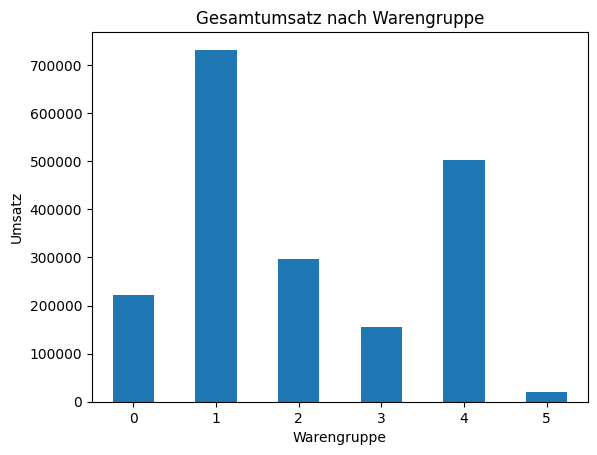

In [27]:
# Umsatzdaten visualisieren mit Warengruppe auf X-Achse und Umsatz auf Y-Achse
umsatzdaten.groupby('Warengruppe')['Umsatz'].sum().plot(kind='bar')
plt.xticks(rotation=0)  # X-Achsenbeschriftungen aufrecht anzeigen
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))  # Formatierung der Warengruppen ohne Nachkommastelle
plt.xlabel('Warengruppe')
plt.ylabel('Umsatz')
plt.title('Gesamtumsatz nach Warengruppe')
plt.show()

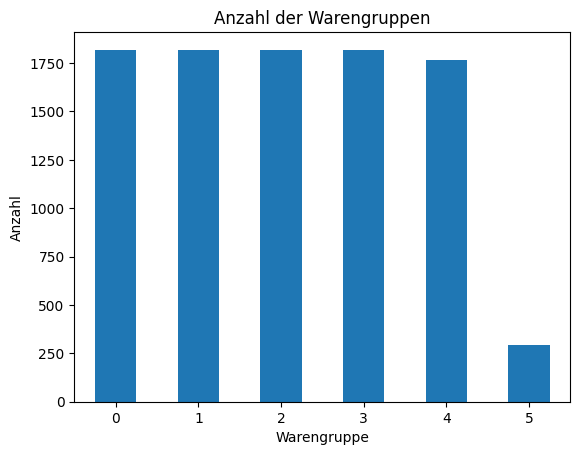

In [28]:
# Warengruppen visualisieren
umsatzdaten['Warengruppe'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)  # X-Achsenbeschriftungen aufrecht anzeigen
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))  # Formatierung der Warengruppen ohne Nachkommastelle
plt.xlabel('Warengruppe')
plt.ylabel('Anzahl')
plt.title('Anzahl der Warengruppen')
plt.show()

In [29]:
# Korrelationsmatrix für Umsatzdaten
print(umsatzdaten.corr())


                            Datum  Warengruppe    Umsatz  Bewoelkung  \
Datum                    1.000000    -0.006639 -0.086901   -0.019253   
Warengruppe             -0.006639     1.000000 -0.062589    0.023795   
Umsatz                  -0.086901    -0.062589  1.000000   -0.089916   
Bewoelkung              -0.019253     0.023795 -0.089916    1.000000   
Temperatur              -0.019917    -0.047015  0.222935   -0.383888   
Windgeschwindigkeit     -0.020052    -0.009078  0.014705    0.042813   
Wettercode              -0.114740     0.009547 -0.010091    0.525852   
KielerWoche              0.033931    -0.010207  0.058244    0.010423   
Temperatur_kat          -0.009197    -0.044658  0.206505   -0.380492   
Feiertag                 0.000659    -0.006163  0.043574   -0.031793   
Wochenende               0.002347     0.000457  0.163097   -0.006312   
Monat                   -0.044090     0.080817  0.013889    0.032380   
Temp_abw                 0.029410    -0.000134 -0.007693   -0.09

In [30]:
# Fit the linear model (erster Versuch)
mod = smf.ols('Umsatz ~ C(Warengruppe) + Temperatur + Wochenende + KielerWoche + Feiertag', data=umsatzdaten).fit()

# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2583.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        14:44:33   Log-Likelihood:                -53734.
No. Observations:                9318   AIC:                         1.075e+05
Df Residuals:                    9308   BIC:                         1.076e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                57.17

In [31]:
# Modell mit Interaktionseffekten
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import itertools

# Formel für die multiple lineare Regression mit ausgewählten Interaktionseffekten
formula = 'Umsatz ~ C(Warengruppe) + Temperatur + Wettercode + C(KielerWoche) + C(Feiertag) + C(Wochenende) + Monat'

# Hinzufügen spezifischer Interaktionseffekte
interaction_terms = [
    'Temperatur:Wochenende',
    'KielerWoche:Warengruppe',
    'Wettercode:Temperatur',
    'Monat:Temperatur'
]

# Hinzufügen der Interaktionseffekte zur Formel
for term in interaction_terms:
    formula += ' + ' + term

# Modell anpassen
model = smf.ols(formula=formula, data=umsatzdaten).fit()

# Zusammenfassung des Modells ausgeben
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1113.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        14:44:34   Log-Likelihood:                -40330.
No. Observations:                7009   AIC:                         8.069e+04
Df Residuals:                    6993   BIC:                         8.080e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [32]:

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Neue Zeitvariablen hinzufügen
umsatzdaten['Wochentag'] = pd.to_datetime(umsatzdaten['Datum']).dt.dayofweek
umsatzdaten['Kalenderwoche'] = pd.to_datetime(umsatzdaten['Datum']).dt.isocalendar().week
umsatzdaten['Jahreszeit'] = pd.to_datetime(umsatzdaten['Datum']).dt.month % 12 // 3 + 1

# Polynomialterme hinzufügen
umsatzdaten['Temperatur_squared'] = umsatzdaten['Temperatur'] ** 2
umsatzdaten['Windgeschwindigkeit_squared'] = umsatzdaten['Windgeschwindigkeit'] ** 2

# Lagged Variables hinzufügen (Umsatz einen Tag und eine Woche zuvor)
umsatzdaten['Umsatz_lag1'] = umsatzdaten['Umsatz'].shift(1)
umsatzdaten['Umsatz_lag7'] = umsatzdaten['Umsatz'].shift(7)

# Dummy-Variablen für besondere Ereignisse
umsatzdaten['Weihnachten'] = np.where(umsatzdaten['Datum'].isin(['2012-12-24', '2012-12-25', '2012-12-26', '2013-12-24', '2013-12-25', '2013-12-26']), 1, 0)

# Formel für die multiple lineare Regression mit neuen Variablen
formula = 'Umsatz ~ C(Warengruppe) + Windgeschwindigkeit + KielerWoche + Feiertag + Wochenende + Monat + Temp_abw + Wochentag + Kalenderwoche + Temperatur + Umsatz_lag1 + Umsatz_lag7'

# Hinzufügen spezifischer Interaktionseffekte
interaction_terms = [
    'KielerWoche:Warengruppe',
    'Wettercode:Temperatur',
    'Monat:Temperatur',
]

# Hinzufügen der Interaktionseffekte zur Formel
for term in interaction_terms:
    formula += ' + ' + term

# Modell anpassen
model = smf.ols(formula=formula, data=umsatzdaten).fit()

# Zusammenfassung des Modells ausgeben
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     915.4
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        14:44:34   Log-Likelihood:                -39913.
No. Observations:                6959   AIC:                         7.987e+04
Df Residuals:                    6939   BIC:                         8.000e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

/tmp/ipykernel_35497/3893334493.py:20: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  umsatzdaten['Weihnachten'] = np.where(umsatzdaten['Datum'].isin(['2012-12-24', '2012-12-25', '2012-12-26', '2013-12-24', '2013-12-25', '2013-12-26']), 1, 0)
